In [ ]:
'''
Linear Regression

what is Linear Regression?
- A supervised learning algorithm which predicts a output value based on single/multiple input values. 
- it works on the equation, Y=mX+C   where Y is the dependent variable/output
                                     m is the slpoe of the line
                                     X is the independent variable/input
                                     C is the intercept of the line.

There are different kinds of Linear Regression Model:-

Simple Linear Regression: A linear regression model with one independent and one dependent variable.

Multiple Linear Regression: A linear regression model with more than one independent variable and one dependent variable.

Polynomial Linear Regression:  polynomial regression is a form of regression analysis in which the relationship between the independent variable x 
and the dependent variable y is modelled as an nth degree polynomial in x. 
or in simple words when the data is not linear.

Regularisation: Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function 
and prevent overfitting or underfitting.
'''

In [ ]:
'''
when do we use Linear Regression?
when we are given a input value(s) and we want to predict the output values.

for example: if we want to predict the packages of students based on the cgpa of the students, we use a linear regression model.
prediction= m*cgpa + C

in real life data is not exactly linear but it is sort of linear, and when the data is sort of linear it finds or gives a best fit line. 
'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files


Simple Linear Regression

example 1

In [ ]:
upload= files.upload()


Saving 1.01. Simple linear regression.csv to 1.01. Simple linear regression.csv


In [ ]:
df= pd.read_csv('1.01. Simple linear regression.csv')
df.shape

(84, 2)

In [ ]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Text(0, 0.5, 'GPA')

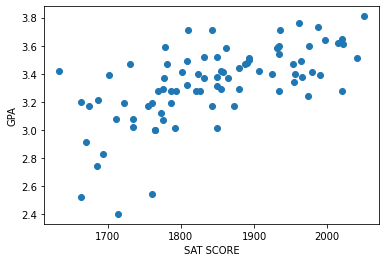

In [ ]:
#looking at the data and its linear fit line.
plt.scatter(df['SAT'],df['GPA'])
plt.xlabel('SAT SCORE')
plt.ylabel('GPA')

In [61]:
#separating x and y for independent and dependent variable
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [62]:
x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [63]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [65]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [66]:
#this fit method is used to train the data
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
x_test

,SAT
11,1775
0,1714
77,2020
28,2020
78,1843
59,1891
14,1773
29,1794
79,1936
62,1893


In [68]:
y_test

11    3.07
0     2.40
77    3.65
28    3.28
78    3.71
59    3.48
14    3.12
29    3.28
79    3.71
62    3.50
41    3.38
23    3.21
25    3.28
21    3.19
13    3.08
71    3.59
27    3.28
Name: GPA, dtype: float64

In [69]:
lr.predict(x_test.iloc[4].values.reshape(-1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.3250213])

Text(0, 0.5, 'GPA')

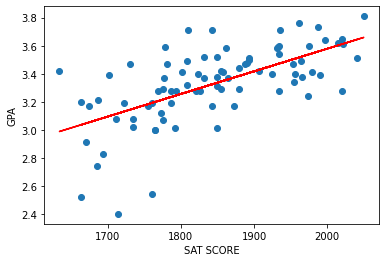

In [70]:
#plotting a best fit line
plt.scatter(df['SAT'],df['GPA'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('SAT SCORE')
plt.ylabel('GPA')

In [71]:
#looking for slope m and intercept c
m= lr.coef_
m

array([0.00161365])

In [72]:
c= lr.intercept_
c

0.35106985312952865

In [73]:
#y=m*X+c
#gpa= m*sat + c
m * 1857 + c

array([3.34761235])

In [74]:
#this means for the given sat score, following will be the gpa of the student.


Different ways to find the value of m and c

In [ ]:
'''
there are 2 ways to find the value of m and c :

1. Closed form expression: in mathematics, if we can form a formula to any problem using operations and functions. 
so one way is to use OLS (Oridinary Least Squares) which is also used by Scikit learn to find m and c. this is the direct formula.

2. Non-Closed form expression: approximation based technique using differentiation called GRADIENT DESCENT.
'''


'''
ques) why do we use gradient descent when we have direct formula?
- when we work with higher dimensions of data it becomes very difficult to use the direct formula and it becomes efficient to use gradient descent.
'''

b = Y-mX

where

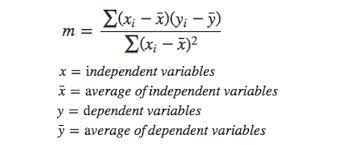

In [76]:
#the prediction value in ML is represented by hat.

In [77]:
#error of best fit line: E= d1+d2+d3+...+dn    where n is the total number of points and d1,d2 are the distances of points.
#                        E=d1sq+ d1sq+ d3sq+...+ dnsq squaring to make all distances positive
#                        E= summation i=1 to n disq, we want such a value of m and c so that the value of this eq will be minimum.
#                        di=(yi-yihat)  yi=actual value and yihat is value predicted by model
#                        E= summation i=1 to n (yi-yihat)

1/n is for mean average error. for total error 1/n can be removed.

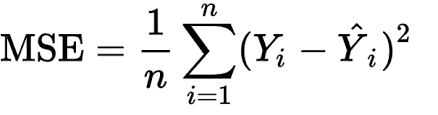

In [78]:
#         E(m,c)=summation i=1 to n (yi- mXi-b)sq
#  finding the such a value of m and c so that the value of this eq will be minimum.
#         E(m)=summation i=1 to n (yi- mXi)sq  if b=0, the line will pass through origin.
#         E(c)=summation i=1 to n (yi- Xi-b)sq  if m=0
# thus, the relationship between E,c and E,m is the same. 

3D visualisation of error function

for a certain value of m and c the error is max at global maxima and for a certain value of m and c the error is max at global minima. At minima, m(slope)=0

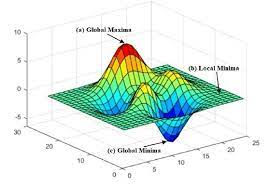

In [79]:
#creating a python class using m and c
class my_LR:
   
   def __init__(self):
     self.m=None
     self.c=None

   def fit(self,x_train,y_train):

     num=0
     den=0
     for i in range(x_train.shape[0]):                #the code will run 67 times
       num = num + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
       den = den + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
     self.m = num/den
     self.b = y_train.mean() - (self.m * x_train.mean())
     print(self.m)
     print(self.b)

     
   
   def predict(self,x_test):
     pass

#here we will get x_train and y_train and we will train the model. in LR to train the model means to find/calculate the value of m and c.

In [80]:
#using the same dataset
df= pd.read_csv('1.01. Simple linear regression.csv')
df.shape

(84, 2)

In [81]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [82]:
#segregating the values of x and y
x= df.iloc[:,0].values         #:,0 means all rows and 0th column
y= df.iloc[:,1].values         #:,1 means all rows and 1st column

In [83]:
#all sat scores
x

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050])

In [84]:
#all gpa values
y

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [86]:
x_train.shape

(67,)

In [87]:
model= my_LR()

In [88]:
model.fit(x_train,y_train)  #we got the values of m and b

1.0
-1846.633880597015


In [89]:
x_train.shape[0] 

67

Regression Metrics:

1 MAE- MEAN ABSOLUTE ERROR

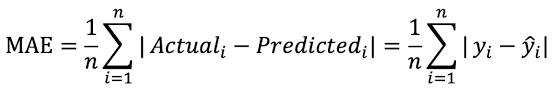


advantages of MAE:

1.the unit of MAE and the output column is same so it becomes easy to compare/calculate the loss.

2.robust to outliers, or handles them.


disadvantges of MAE:


1.the graph of modulus function is not differentiable at zero. this is the reason why we had to introduce MSE.



2 MSE- MEAN SQUARED ERROR


the only difference is rather than using the mod we use the square function.


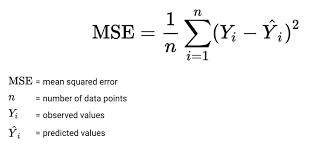


the graph of square function is differentiable at all the points.


advantage of MSE:

1.can be used as a loss function since it is differentiable.



dis-advantage of MSE:

1.not robust(strong) to outliers.



3 RMSE- ROOT MEAN SQUARED ERROR


makes a smaller value smaller and larger value larger.



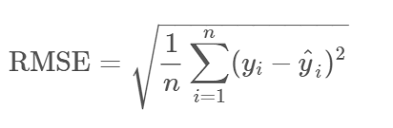

its properties are very similar to that of MSE and its graph is also differentiable.


advantage of RMSE:

1.same unit



disadvantage of RMSE:

1.not robust to outliers.




4 R2 SCORE- COEFFICIENT OF DETERMINATION


if we had only one input data, we could either take the mean and that is the worst case or we could use linear regression that is the best. the comparision of the worst and best is R2SCORE. 

OR


R2 SCORE is the value you get after comparing the mean value and the linear regression value.

It is also known as 'goodness of fit'.

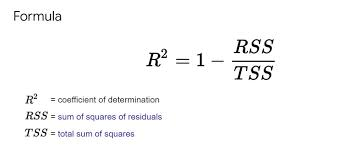



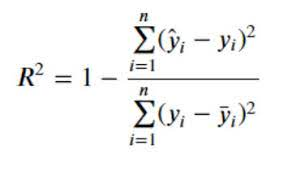


if R2 SCORE= 0, the model is very bad, then we can say the mean line and the regression line are overlapping. 


R2 score nearest to 1 is towards perfection and closer to 0 is worsening of model.

the R2 score should not be negative. it means that the linear regression model is doing more mistakes than the mean.



5 ADJUSTED R2 SCORE-

sometimes even after adding irrelevant columns to the data the R2SCORE either remains the same or increases, due to this we introduced ADJUSTED R2 SCORE.


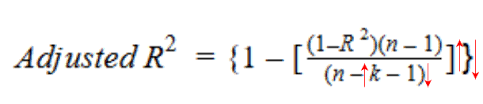


so after this if we add a irrelevant column the ADJUSTED R2SCORE decreases.
and if some revent column is added ADJUSTED R2SCORE increases.


In [91]:
#if the data has too many outliers we should go with MAE and if it has less outliers we should go with less outliers.

#if we are working wth multiple regression or data of too many columns, calculating ADJUSTED R2SCORE is a good idea.

In [92]:
#using the same dataset calculating MAE, MSE, RMSE, R2SCORE, ADJUSTED R2 SCORE
df = pd.read_csv('1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Text(0, 0.5, 'GPA')

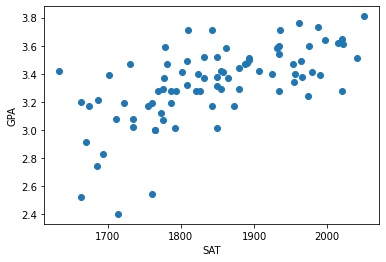

In [93]:
plt.scatter(df['SAT'],df['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')

In [94]:
#segregating x and y
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [95]:
x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [96]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [98]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [99]:
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'GPA')

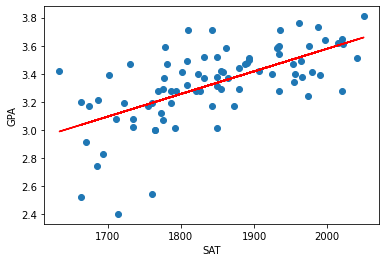

In [103]:
plt.scatter(df['SAT'],df['GPA'])
plt.plot(x_train, lr.predict(x_train),color='red')
plt.xlabel('SAT')
plt.ylabel('GPA')

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
y_pred= lr.predict(x_test)

In [106]:
y_test.values

array([3.07, 2.4 , 3.65, 3.28, 3.71, 3.48, 3.12, 3.28, 3.71, 3.5 , 3.38,
       3.21, 3.28, 3.19, 3.08, 3.59, 3.28])

In [107]:
print('MAE ',mean_absolute_error(y_test,y_pred))

MAE  0.16595330826339283


In [108]:
print('MSE ',mean_squared_error(y_test,y_pred))

MSE  0.06096204250877628


In [109]:
print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE  0.2469049260520662


In [110]:
print('r2 score ',r2_score(y_test,y_pred))             
r2= r2_score(y_test,y_pred)              #0.34 is pretty badd:(

r2 score  0.34672062009016613


In [111]:
#adjusted r2score
x_test.shape

(17, 1)

In [112]:
#using formula of adjusted r2score
1 - ((1-r2)*(17-1)/(17-1-1))

0.3031686614295105

In [113]:
#adding a random column to note changes in r2score and adjusted r2 score
new_df= df.copy()
new_df['random_feature']= np.random.random(84)

new_df= new_df[['SAT','random_feature','GPA']]
new_df.head()

,SAT,random_feature,GPA
0,1714,0.921070,2.40
1,1664,0.128400,2.52
2,1760,0.855827,2.54
3,1685,0.122117,2.74
4,1693,0.905028,2.83


Text(0, 0.5, 'GPA')

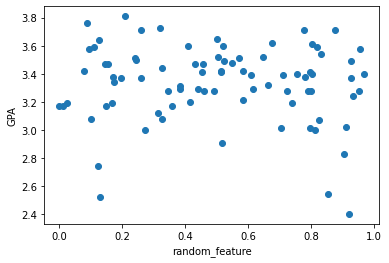

In [114]:
#plotting the graph again
plt.scatter(new_df['random_feature'],df['GPA'])

plt.xlabel('random_feature')
plt.ylabel('GPA')

In [115]:
x= new_df.iloc[:,0:2]
y= new_df.iloc[:,-1]

In [116]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [117]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
y_pred=lr.predict(x_test)

In [119]:
print('r2 score ',r2_score(y_test,y_pred))             #it increased from 0.34672062009016613 to  0.37649730344168864 which should not happen because that
r2= r2_score(y_test,y_pred)                            #column was totally irrelevent.

r2 score  0.38135053084997683


In [120]:
#using formula of adjusted r2score
1 - ((1-r2)*(17-1)/(17-1-1))               #it also increased a bit from 0.3031686614295105 to 0.3349304570044679


0.3401072329066419

In [121]:
print('MSE ',mean_squared_error(y_test,y_pred))

MSE  0.057730484684149874


simple linear regression 

example 2 

In [122]:
upload_data= files.upload()

Saving score.csv to score.csv


In [123]:
df_1= pd.read_csv('score.csv')
df_1.shape

(25, 2)

In [124]:
df_1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Scores')

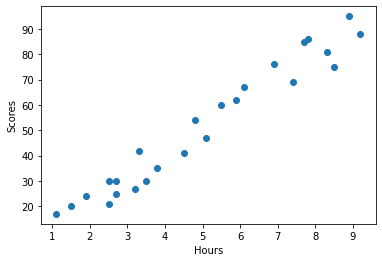

In [125]:
plt.scatter(df_1['Hours'],df_1['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

In [126]:
x=df_1.iloc[:,0:1]
y=df_1.iloc[:,-1]

In [127]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [128]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [130]:
lr_model= LinearRegression()

In [131]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [132]:
x_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [133]:
y_test

14    17
0     21
17    24
6     88
23    76
Name: Scores, dtype: int64

Text(0, 0.5, 'Scores')

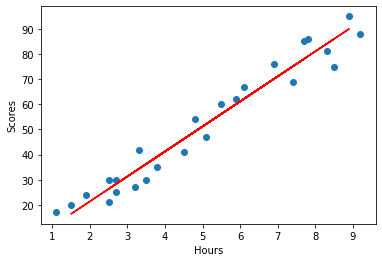

In [134]:
plt.scatter(df_1['Hours'],df_1['Scores'])
plt.plot(x_train, lr_model.predict(x_train),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [135]:
#slope and intercept
m= lr_model.coef_
m


array([9.94061514])

In [136]:
c= lr_model.intercept_
c

1.5079104828268939

In [137]:
y_pred=lr_model.predict(x_test)

In [138]:
y_test.values

array([17, 21, 24, 88, 76])

In [139]:
#calculating errors and r2 values
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [140]:
print('MAE', mean_absolute_error(y_test,y_pred))

MAE 4.877039354964476


In [141]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 24.387620339856596


In [142]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 4.9383823606376005


In [143]:
print('r2 score',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2 score 0.9735538080811826


In [144]:
#adjusted r2 score
x_test.shape

(5, 1)

In [145]:
1-((1-r2)*(5-1)/(5-1-1))

0.9647384107749102

In [146]:
#adding a random feature to see change in r2 score and adj r2 score
df_new= df_1.copy()
df_new['new feature']= np.random.random(25)

df_new= df_new[['Hours','Scores','new feature']]
df_new.head()

,Hours,Scores,new feature
0,2.5,21,0.709159
1,5.1,47,0.184140
2,3.2,27,0.188103
3,8.5,75,0.942094
4,3.5,30,0.885209


In [147]:
x= df_1.iloc[:,0:2].values
y=df_1.iloc[:,-1].values

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [149]:
lrz=LinearRegression()
lrz.fit(x_train,y_train)
y_pred=lrz.predict(x_test)

In [150]:
print('r2 score',r2_score(y_test,y_pred))
r_2=r2_score(y_test,y_pred)
#chnaged from  0.9735538080811826 to 1.0, there should not be an increase since the new feature is totally irrelevent column.

r2 score 1.0


In [151]:
#adjusted r2 score
x_test.shape

(5, 2)

In [152]:
1-((1-r2)*(5-1)/(5-1-2))

#the adjusted r2 score decreased from 0.9647384107749102 to 0.9471076161623653 which means that the column was irrelevent.


0.9471076161623653

MULTIPLE LINEAR REGRESSION

In [ ]:
'''
multiple linear regression: more than one input columns or independent columns.
in real world data, multiple linear regression is used more often than simple linear regression.

in other words, multiple linear regression is just an extension of simple linear regression.

in linear regression, if we had 1 input column and 1 output column we can visualise it as 2D data, if we have  
2 input column and 1 output column we can visualise it as 3D data and so on..


in simple linear regression we had a best fit line and in multiple linear regression we have a plane that passes from the points.
if the data is in 4D or 5D, the plane is then called a HYPERPLANE.
'''

In [ ]:
'''
equation for multiple linear regression

for 3D: 2 inputs and 1 output

Y = mX1+ nX2 + C
Y = beta not+ beta1X1 + beta2X2

comparing from Y= mX+C
             m becomes beta1 , C becomes beta not and beta 2 is due to the another input column.
             so here we need to find beta not, beta1 and beta2



for 4D: 3 inputs and 1 output
we have to find beta not, beta1, beta2 and beta3 



for nth dimensinal data:

Y = beta not+ beta1X1 + beta2X2 + ... + betanXn

Y = beta not+ summation i=1 to n betaiXi



so if we have n columns we will have n+1 coefficients.
'''


'''
example:  lpa= beta not + beta1*cgpa + beta2*iq
          so beta1, beta2 are weightages means, lpa calculate karne me cgpa aur iq ka kitna weightage hai.
          to agar beta1 ka value kum hai, that means lpa calculate krne me cgpa ka utna zarurat nahi hai aur agar
          agar beta2 ka value kum hai, that means lpa calculate krne me iq ka utna zarurat nahi hai.

          and beta not represents the offset 
          which means if beta1 and beta2 are zero then the lpa will be decided by offset.
          


so to summarise:
in multiple linear regression we have to find the equation of a hyperplane. esi equation find krna h jo sare points ke closest ho.
'''

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression       #to make my own dataset
import plotly.express as px            
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
'''
The plotly. express module (usually imported as px ) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. 
Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures.


The plotly. graph_objects module (typically imported as go ) contains an automatically-generated hierarchy of Python classes

'''

In [157]:
#generating a dataset
x,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)        #2 inputs and 1 output

In [158]:
df= pd.DataFrame({'feature1':x[:,0],'feature2': x[:,1], 'target': y})

In [159]:
df.shape

(100, 3)

In [160]:
df.head()

,feature1,feature2,target
0,1.022770,0.289971,76.233725
1,0.766219,1.114078,26.535435
2,-1.131816,0.058677,-84.466206
3,1.632409,1.200449,28.840147
4,-0.219756,0.496032,20.659657


In [161]:
#visualising the data in 3D using plotly library   (import plotly.express as px)
figure= px.scatter_3d(df, x='feature1', y='feature2', z='target')

figure.show()

In [162]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=3)

In [163]:
lr= LinearRegression()

In [164]:
lr.fit(x_train,y_train)

LinearRegression()

In [165]:
y_pred= lr.predict(x_test)

In [166]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 SCORE',r2_score(y_test,y_pred))               #80.2 this means both the input columns are able to explain 80% of variance.

MAE 27.71566558221199
MSE 1546.8305679047342
R2 SCORE 0.679645398407341


In [167]:
#generating a hyperplane
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final= lr.predict(final).reshape(10,10)

z= z_final




In [168]:
figure = px.scatter_3d(df, x='feature1', y='feature2', z='target')

figure.add_trace(go.Surface(x=x,y=y,z=z))

figure.show()

In [169]:
lr.coef_       #we are getting 2 values because we had 2 inputs, it could be n if inputs were n 
               #these are the values of beta1 and beta2

array([16.63233981, 61.76423652])

In [170]:
lr.intercept_         #this is the value of beta not

0.9705000523603449

Mathematical formulation for Multiple Linear Regression

In [ ]:
'''
Y= beta not+ beta1X1 + beta2X2 + .... + betanXn
we find the value of beta not, beta1, beta2, ... , beta n


Y hat = X matrix * beta matrix             eq(1)
where Y hat is the predictive value, X matrix for all X values and beta matrix for all beta values.


e= Y- Y hat
Y for actual values and Y hat is the predictive values.
'''

WHY GRADIENT DESCENT?

the scikit learn solves the problem of linear regression in 2 ways: 

-closed form solution(formula) 

-another method is gradient descent. 

but still what is the need of Gradient Descent if there is a formula. it is because if we have a huge dataset ex. n=1000, then this formula takes a lot of time which makes our algorithm slow.

therefore, we use a approximation technique without formula called gradient descent. The answer in both the ways will be nearly the same.



 -for closed form solution we use the direct formula, but for gradient descent we have a class available called SGD Regressor.

-GRADIENT DESCENT is a faster technique to find out solutions to linear regression.

In [172]:
import numpy as np
from sklearn.datasets import load_diabetes

In [173]:
X,y= load_diabetes(return_X_y= True)

In [174]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [175]:
X.shape

(442, 10)

In [176]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [177]:
y.shape

(442,)

Using sklearn's Linear Regression

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


In [179]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [180]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [181]:
reg.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred= reg.predict(X_test)

In [183]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399387660024645

In [184]:
reg.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [185]:
reg.intercept_

151.88334520854633

Making our own Linear Regression class

In [186]:
class MeraLR:

  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

  def predict(self, X_test):
    pass

In [187]:
lr= MeraLR()

In [188]:
lr.fit(X_train,y_train)

In [189]:
X_train

array([[-0.00188202, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.06291295,  0.04034337],
       [-0.00914709, -0.04464164,  0.01103904, ..., -0.03949338,
         0.01703713, -0.0052198 ],
       [ 0.02354575,  0.05068012, -0.02021751, ..., -0.03949338,
        -0.09643322, -0.01764613],
       ...,
       [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
         0.08449528, -0.01764613],
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03605579, -0.04249877],
       [ 0.00175052,  0.05068012,  0.05954058, ...,  0.1081111 ,
         0.06898221,  0.12732762]])

In [190]:
np.insert(X_train,0,1,axis=1)        #here we can see every row has got an additional 1 on it

array([[ 1.        , -0.00188202, -0.04464164, ..., -0.03949338,
        -0.06291295,  0.04034337],
       [ 1.        , -0.00914709, -0.04464164, ..., -0.03949338,
         0.01703713, -0.0052198 ],
       [ 1.        ,  0.02354575,  0.05068012, ..., -0.03949338,
        -0.09643322, -0.01764613],
       ...,
       [ 1.        ,  0.06350368,  0.05068012, ..., -0.00259226,
         0.08449528, -0.01764613],
       [ 1.        , -0.05273755,  0.05068012, ...,  0.1081111 ,
         0.03605579, -0.04249877],
       [ 1.        ,  0.00175052,  0.05068012, ...,  0.1081111 ,
         0.06898221,  0.12732762]])

GRADIENT DESCENT

what is it?

it is an optimization (to optimize means to gain the best possible results) algorithm.

it is a faster way to calculate coefficients m and c.

in short, gradient descent is a algorithm which when given a function that is differentiable at all points, then gradient descent gives you the minima of that function.



Is gradient Descent only applicable on Linear Regression?

no, it is used in Linear Regression, Logistic Regression, t-SNE and it is the backbone of Deep Learning.

Gradient Descent is nothing but a technique to minimize the loss function and find values for different parameters.

In [ ]:
'''
we know that Yihat = mXi+C
             L= Σ i=1 to n(Yi- Yi hat)
             L= Σ i=1 to n(Yi- mXi- C)sq
             L--> Csq


'''

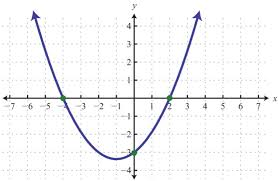

In [ ]:
'''
L vs C curve   (L is on y axis and C is on x axis)
this is the graph of loss function(L) and intercept C. since  L--> Csq is the relation between L and C, it is a parabolic graph.
in this graph we need to find such a value of C such that L is minimum. 

if we had OLS(direct formula)we would have differentiated and found the minimum L value because we would face problem in higher dimensions.

so we want to use gradient descent.

STEP1. select a random C value (and we want to move towards the minimum value.)

STEP2. at whatever point we are, we will find the slope of it. the direction of slope will guide us weather we have to move backward or
forward. 
if the slope is negative we have to move forward on the curve (increament in C value) and 
if the slope is positive we have to move backward on the curve.(increament in C value)


in all, the direction of the slope is guiding us to move towards the slope of the curve.

so,
 C(new) = C(old)-slope           (equation for gradient descent.)

ex: c(new)= -10-(-50) =>  40
    c(new)=  10-(50) => -40

but after using this equation we see that we are jumping from -ve to +ve values and vice versa after every iteration, so to avoid this we transform this eq:

C(new) = C(old)- η slope      where η is the learning rate. in general the value of η = 0.01

ex:  C(new) = -10-(0.01*-50)  =>  -10+ (0.01*50)  => -10+ 0.5 => -9.5

-9.5 is very close to -10 from where we started and we did not have a big jump from -ves to +ves.

second iteration:   C(new)= -9.5-(0.01*-40) => -9.5+(0.01*40) => -9.5+0.4 => -9.1   (we assumed that at -9.5 the slope would be -40)

and -9.1 is again close to -9.5 so in this way learning rate helps us to skip jumping. the value of learning rate should be smaller than 1
 i.e. 0.01, 0.001,
  
'''


In [ ]:
'''
Q) when to stop the iterations on the curve?

1) if C(new) = C(old) = 0.0001 is a very small number and it would not cause any significant change in the next iteration then at that point we must stop.
and if C(new) = C(old) = 0 then we should know that we are not making any movement and it also means that we are converging towards the solution.

or 

2) we can stop when we limit the number of iterations and the loop will run that many times. for ex, 1000, 100.
here the iterations are called epochs.
'''

mathematics formulation

In [ ]:
'''
start with a random C value 
for i in epochs: (1000)
η=0.01
assuming slope= 78.35
C(new) = C(old)- η*slope
L= Σ i=1 to n(Yi- Yi hat)sq
dL/dC = d/dC(Σ i=1 to n(Yi- Yi hat)sq)
dL/dC = d/dC(Σ i=1 to n(Yi-mXi-C)sq       differentiating this equation

dL/dC = 2Σ i=1 to n(Yi-mXi-C)(-1)
      = -2 Σ i=1 to n(Yi-mXi-C) ***********this is the equation of slope and now we put C=0**********       IMPORTANT FORMULA
      = -2 Σ i=1 to n(Yi-mXi-0)   rewriting this eq as 
      = -2 Σ i=1 to n(Yi-78.35*Xi-0)  after solving this equation for all points with Yi we get the slope at C=0


C(new)= C(old)- η slope      (slope for c(old=0) and we get C(new) and the loop will run and the slope will be for c=1)
                                                now this c(new) ↑ will become c(old) for the second iteration.

****calculating η*slope is known as the STEP SIZE*******

in short har baar jo C aaye uska value c(old) me daalte jana hai aur har baar uss particular point ke liye slope nikalte jana hai.
learning rate se multiply karte jana hai aur c(old) se subtract krte jana hai aur c(new) ki value nikalti jayegi.


this is how gradient descent works.
'''


writing a code for gradient descent

In [197]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


In [198]:
X,y = make_regression(n_samples=4 , n_features=1 , n_informative=1 , n_targets=1 , noise=80 , random_state=13)

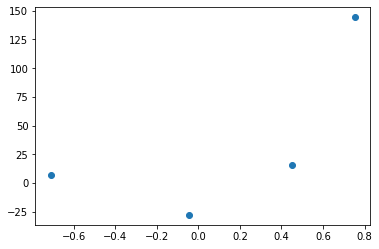

In [199]:
plt.scatter(X,y)

In [200]:
#lets apply OLS(direct formula)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X,y)

LinearRegression()

In [201]:
reg.coef_

array([78.35063668])

In [202]:
reg.intercept_

26.15963284313262

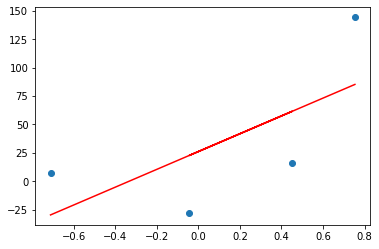

In [203]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [204]:
#now lets apply Gradient Descent assuming the slope is constant m=78.35
#and lets assume the starting value for intercept b=0
y_pred = ((78.35*X)+0).reshape(4)

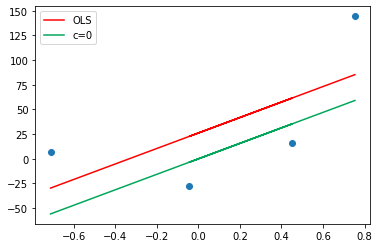

In [205]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='c=0')          ##00a65a is a color code
plt.legend()                                            #c for the red line is 26.159
plt.show()

In [206]:
#now we are applying gradient descent and we will see that the green line is moving towards the red line kyuki c ka value 26.15 ke pass jane lagega
m= 78.35
c= 0

loss_slope = -2*np.sum(y-m*X.ravel()-c)
loss_slope       #the slope at b=0 

-209.27763408209216

In [207]:
#taking learning rate=0.1
lr=0.1

step_size = loss_slope * lr         #calculating η*slope= step size
step_size

-20.927763408209216

In [208]:
#     calculating C(new):
#     C(new)=C(old)-η*slope
c = c-step_size
c                                  #this is C(new), we had to go till 26.15 and we already reached from 0 to 20.92

20.927763408209216

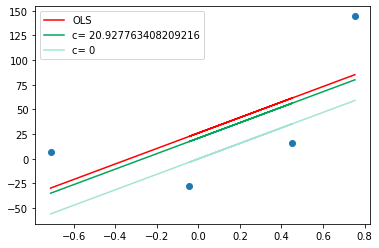

In [209]:
#since we have got the c(new) and slope is constant, calculating y again to plot the graph
y_pred1 = ((78.35*X)+c).reshape(4) 

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='c= {}'.format(c))
plt.plot(X,y_pred, color='#A3E4D7',label='c= 0')
plt.legend()
plt.show()
#light blue is for c=0 and c=20.92 is for present case. we can see that we are moving towards the correct red line

In [210]:
#iteration 2
loss_slope = -2*np.sum(y-m*X.ravel()-c)
loss_slope

-41.85552681641843

In [211]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [212]:
c=c-step_size
c          #we are reaching closer to  26.15

25.11331608985106

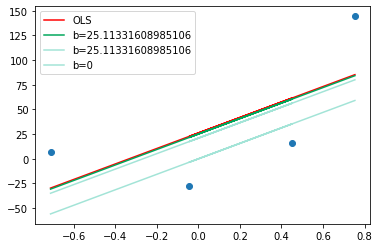

In [213]:
y_pred2 = ((78.35* X)+c).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b={}'.format(c))
plt.plot(X,y_pred1,color='#A3E4D7',label='b={}'.format(c))
plt.plot(X,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()
#we are almost near (25.11)the red line(26.15) which is the correct line.

In [214]:
#iteration 3 
loss_slope= -2*np.sum(y-m*X.ravel()-c)
loss_slope

-8.371105363283675

In [215]:
step_size= loss_slope*lr
step_size

-0.8371105363283675

In [216]:
c=c-step_size
c
#very close to 26.15
#and similarly we can go for 2-3 more iterations and the it will almost overlap the red line.

25.95042662617943

In [217]:
#the pattern is when you are very far away it takes big steps and when we are close to the red line it takes very small steps, this is due to the learning 
# rate.

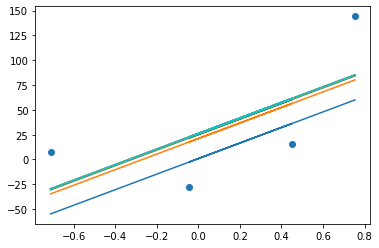

In [218]:
#performing this directly through loop.
c=-100    #taking random c value
m=78.35
lr=0.1

epochs=10  #iterations

for i in range(epochs):
  loss_slope=-2*np.sum(y-m*X.ravel()-c)
  c=c-(lr*loss_slope)

  y_pred= m*X+c

  plt.plot(X,y_pred)

plt.scatter(X,y)

#after 10 iterations we reached the correct line.
#if we take a very smaller learning rate then it starts taking very very small steps and possibly we wont reach the correct answer.

making a new class: GD Regressor


In [219]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [220]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

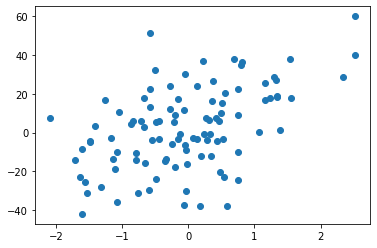

In [221]:
plt.scatter(X,y)

In [222]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[11.07685691]
2.8400729690825415


In [223]:
m= 29.19

In [224]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m=29.19
    self.c=-120
    self.lr=learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    #calculating c using GD
    for i in range(self.epochs):
      loss_slope= -2*np.sum(y-m*X.ravel()-self.c)
      self.c= self.c-(self.lr*loss_slope)
      print(loss_slope,self.c)
    print(self.c)

In [225]:
gd= GDRegressor(0.1,10)      #0.1 is learning rate and 10 is epoch

In [226]:
gd.fit(X,y)      #the slope is this value because we put the learning rate too high. lets fix it. 

-24743.84339183705 2354.3843391837054
470133.02444490406 -44658.9181053067
-8932527.464453178 848593.8283400111
169718021.82461035 -16123208.354121024
-3224642414.6675963 306341033.11263865
61268205878.68434 -5820479554.755796
-1164095911695.0024 110589111614.74445
22117822322205.047 -2101193120605.7605
-420238624121895.9 39922669291583.83
7984533858316022.0 -758530716540018.4
-758530716540018.4


In [ ]:
gd= GDRegressor(0.001,100)  
gd.fit(X,y)

-23834.553168535964 -96.16544683146404
-19067.64253482877 -77.09780429663527
-15254.11402786302 -61.84369026877226
-12203.291222290414 -49.640399046481846
-9762.632977832332 -39.877766068649514
-7810.106382265867 -32.06765968638365
-6248.085105812694 -25.819574580570958
-4998.468084650155 -20.8211064959208
-3998.7744677201235 -16.822332028200677
-3199.019574176099 -13.623312454024578
-2559.2156593408786 -11.0640967946837
-2047.3725274727037 -9.016724267210996
-1637.8980219781633 -7.378826245232833
-1310.3184175825302 -6.068507827650303
-1048.2547340660244 -5.020253093584278
-838.6037872528193 -4.181649306331459
-670.8830298022554 -3.510766276529204
-536.7064238418045 -2.9740598526873994
-429.3651390734436 -2.5446947136139557
-343.49211125875496 -2.2012026023552007
-274.7936890070039 -1.9264089133481967
-219.83495120560312 -1.7065739621425937
-175.86796096448228 -1.5307060011781115
-140.69436877158603 -1.3900116324065255
-112.55549501726878 -1.2774561373892568
-90.04439601381509 -1.1874

In [ ]:
#till now we had put m constant and we changed our c all the time, now we will see variation in both m and c
'''

step1) initialise random values for m and b;  m=1 and b=0
step2) deciding the number of epochs; epochs=100, lr=0.01

for i in epochs:
  c=c-η*slope
  m=m-η*slope                  #now there are 2 different slopes, and we will know what are these and how are they diff
  '''

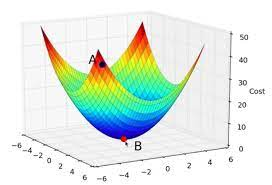

In [ ]:
#the y axis is loss, x axis is m and z is c
'''
formulae: 
  
  ************important************

dL/dC = -2Σ(Yi-mXi-C)      this is slope w.r.t C at C=0
dL/dm = -2Σ(Yi-mXi-C)Xi    this is slope w.r.t m at m=1
'''

In [229]:
#code for m and c variables
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [230]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

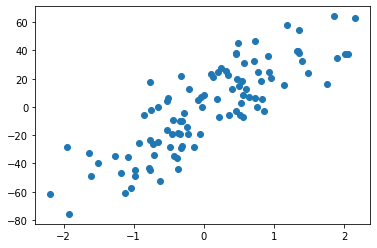

In [ ]:
plt.scatter(X,y)

In [231]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [232]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [233]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m=100
    self.c=-120
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,X,y):
    for i in range(self.epochs):
      loss_slope_c= -2*np.sum(y-self.m*X.ravel()-self.c)
      loss_slope_m= -2*np.sum((y-self.m*X.ravel()-self.c)*X.ravel())
      
      self.c= self.c-(self.lr*loss_slope_c)
      self.m= self.m-(self.lr*loss_slope_m)
    print(self.m,self.c)



In [234]:
gd=GDRegressor(0.001,100)

In [235]:
gd.fit(X,y)     #these values are same as the above: [27.82809103] and -2.29474455867698


27.828091872608653 -2.2947448944994893


effect of loss function on gradient descent

In [ ]:
'''
the loss function we used was the mean squared error
L = summation(Yi- Yi hat)sq
this is a very useful loss function because it is a CONVEX LOSS FUNCTION.
A convex function is a function in which when two points on the curve are plotted then the line drawn would never cross the function. A convex function is 
useful in gradient descent because it would not have any local minima but only a global minima.
'''


'''
another problem is a Saddle point problem: In this type of problem if we had reached a plateau on the curve and the slope would change very slowly
then it would take too long to reach to the actual solution or if we had set the no of epochs to be a few maybe 10 or 15 then possibly we would never reach 
the actual solution.
'''

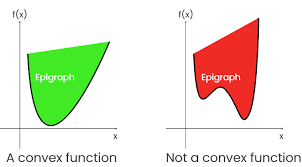


saddle point problem

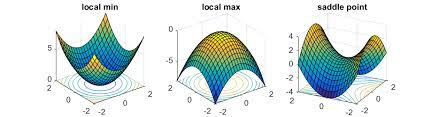

Types of Gradient Descent:

1.Batch Gradient Descent

2.Stochastic Gradient Descent

3.Mini batch Gradient Descent

In [ ]:
'''
we know that the Gradient Descent is an optimization algorithm used in various ML algortihms to reach towards the solution

Batch Gradient Descent:
we know that we had,   m(new)= dL/dm = m(old)- η*slope  at m=0
               and     c(new)= dL/dc = c(old)- η*slope  at c=0

here, in batch gradient descent we use all our data to calculate the slope. in simpler words, if we had 300 rows we would see all the rows and then update 
the m(old).
the code that we had written previously was an example of Batch Gradient Descent.
this algorithm is very slow and it has many computational problems. 
to escape these, we have Stochastic Gradient Descent.


In Stochastic Gradient Descent, the updates are taken on the basis of one row and not all 300 rows. it is fast and it especially suitable for large datasets


Mini Batch Gradient Descent: it balances the things between Batch and Stochastic Gradient Descent. In this, we decide a Batch size, ex, out of 300 rows we 
decided a batch of 30 rows, so now the updates on m and c will be taken after seeing 30 rows.

So for Batch Gradient Descent on 300 rows data, we had to update only ONCE, whereas in Stochastic Gradient Descent we have to update 300 times and in
Mini Batch Gradient Descent we have to update 10 times.

mostly Stochastic Gradient Descent and Mini Batch Gradient Descent are used and Batch Gradient Descent is quite rare.
'''


In [ ]:
'''
1. Batch Gradient Descent:
the code that we had written previously was an example of Batch Gradient Descent and we had seen for 2D data to find m and C.
now we will see for nD data, and we will try to find n+1 coefficients.

MATHEMATICAL FORMULATION:

Y= βnot + β1X1 + β2X2...

step1: set random values
      βnot=0, β1,β2=1..

step2: epochs=100, lr=0.1
      βnot= βnot-η*slope
      β1 = β1-η*slope
      β2 = β2-η*slope

so if we talk about  βnot, β1, β2 and loss function, it would be a 4D graph.
we have to find slope on this graph, it will have three components, one in direction of βnot, another in direction of β1 and
another in direction of β2.

so simply we have to find the equation of loss and differentiate with respect to dL/dβnot , dL/dβ1, dL/dβ2 and we get the three slopes.

L= 1/n Σ i=1 to n(Yi - Yi hat)sq       we have to find such values of βnot, β1, β2 that this loss is minimized.

after some sick math,

slope of βnot: -2/n Σ i=1 to n(Yi - Yi hat)= dL/dβnot  ------(1)

slope of β1: -2/n Σ i=1 to n(Yi - Yi hat)Xi1 = dL/dβ1 -------(2)   #Xi1 represents the data of column 1 wrt to β1   

slope of β2: -2/n Σ i=1 to n(Yi - Yi hat)Xi2 = dL/dβ2 -------(3)   #Xi2 represents the data of column 2 wrt to β2

so if there are m columns, then

slope of βm = dL/dβm =  -2/n Σ i=1 to n(Yi - Yi hat)Xim            #Xim represents the data of column m wrt to βm

'''

Batch Gradient Descent

In [239]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [240]:
X,y= load_diabetes(return_X_y=True)

In [241]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [242]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [243]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [244]:
print(reg.coef_)
print(reg.intercept_)
#so when we will use gradient descent our target will be to fetch these values.
#10 beta values β1,β2,........,β10 and the intercept is the βnot value.

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [245]:
y_pred= reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [246]:
#making a class
class GDRegressor:

  def __init__(self,learning_rate=0.1,epochs=100):

   self.coef_ =None
   self.intercept_ =None
   self.lr = learning_rate=0.1
   self.epochs= epochs
  
  def fit(self,X_train,y_train):
    #initialise your coefs
    self.intercept_ =0
    self.coef_ = np.ones(X_train.shape[1])
    
    for i in range(self.epochs):
      #update all the coef and intercepts
      y_hat= np.dot(X_train,self.coef_) + self.intercept_
      intercept_der= -2* np.mean(y_train - y_hat)
      self.intercept_ = self.intercept_ - (self.lr *intercept_der)

      coef_der = -2* np.dot((y_train - y_hat),X_train)/X_train.shape[0]
      self.coef_ = self.coef_ - (self.lr * coef_der)

    print(self.intercept_ ,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_ 

In [247]:
gdr = GDRegressor(epochs=1000, learning_rate=0.5)

In [248]:
gdr.fit(X_train, y_train)

151.94043481425678 [  62.27814169  -24.14066729  262.40222053  192.20902828   39.48791536
   10.26869856 -142.5060393   124.33305283  244.33532841  119.34321317]


In [249]:
y_pred = gdr.predict(X_test)

In [250]:
r2_score(y_test,y_pred)

0.39717004786105725

Stochastic Gradient Descent

In [252]:
'''
the problem with batch gradient descent: it was that we had to calculate the derivate of loss function at every coefficient.
                                         1.it becomes very slow on Big Data.
                                         2.hardware
basically we dont have any problem with batch gradient descent but we have problem with its implementation.
so, we perform Stochastic Gradient Descent.
'''

'\nthe problem with batch gradient descent: it was that we had to calculate the derivate of loss function at every coefficient.\n                                         1.it becomes very slow on Big Data.\n                                         2.hardware\nbasically we dont have any problem with batch gradient descent but we have problem with its implementation.\nso, we perform Stochastic Gradient Descent.\n'

In [ ]:
'''
Stochastic Gradient Descent: here, we update the coefficient after seeing a single row and we keep doing it n times for n rows.
                             1. So in this, in a single epoch we do n updates which makes it very fast compared to batch gradient descent
                                compared to  batch gradient descent where we could do only a single update in 1 epoch.
                             2. the hardware requirement also doesnt fails here because even if we have very big data the updates will be done in a single 
                                epoch.

in this, we pick one row at once to update but that doesnt go sequence wise, the rows are picked randomly.

--> A disadvantage of Stochastic Gradient Descent is that it does not give steady solutions which means even if you use the same data again and again you 
would get different solutions due to the random picking of rows.

those random updates would bring you close to the data but that does not mean they will give you the most accurate answers, you would get answers close to 
the actual answer but that would also vary.

'''


'''
when to use Stochastic Gradient Descent:
1. if you have got big data
2. when you have a non-convex function because it escapes from the local minima and reaches the global minima which the Batch Gradient Descent is unable to do

'''

In [254]:
#using the same dataset
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [255]:
X,y = load_diabetes(return_X_y=True)

In [257]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [259]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [260]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [261]:
y_pred= reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [262]:
X_train.shape

(353, 10)

In [263]:
#making a class for STOCHASTIC GRADIENT DESCENT
class SGDRegressor:

  def __init__(self,learning_rate=0.01,epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    for i in range(self.epochs):
       for j in range(X_train.shape[0]):
         idx = np.random.randint(0,X_train.shape[0]) #generating a random number

         y_hat = np.dot(X_train[idx],self.coef_)+self.intercept_

         intercept_der= -2*(y_train[idx]-y_hat)
         self.intercept_ =self.intercept_ - (self.lr * intercept_der)
         coef_der= -2*np.dot((y_train[idx] - y_hat),X_train[idx])
         self.coef_ = self.coef_ -(self.lr*coef_der)
    
    
    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [264]:
np.random.randint(0,X_train.shape[0])  #X_train.shape = (353, 10) so this random number will be between 0 and 353

342

In [265]:
sgd = SGDRegressor(learning_rate=0.01,epochs=50)
sgd.fit(X_train,y_train)

156.08476294772822 [  55.05576603  -68.5283994   355.50445193  244.1912929    16.70865028
  -29.99892568 -179.89828546  133.69555605  325.69351886  127.80850556]


In [266]:
y_pred= sgd.predict(X_test)

In [267]:
r2_score(y_test,y_pred)

0.43252099325671955

In [268]:
#comparing the running time of batch gradient descent versus stochastic gradient descent
import time

In [269]:
#batch gradient descent
start = time.time()
gdr.fit(X_train,y_train)
print('time taken is : ',time.time() - start)

151.94043481425678 [  62.27814169  -24.14066729  262.40222053  192.20902828   39.48791536
   10.26869856 -142.5060393   124.33305283  244.33532841  119.34321317]
time taken is :  0.0405123233795166


In [270]:
#stochastic gradient descent
start = time.time()
sgd.fit(X_train,y_train)
print('time taken is : ',time.time() - start)

143.57094503262095 [  60.54840714  -65.32730729  355.68591948  250.8414434    14.44990994
  -28.21177498 -178.9522026   135.9256269   319.40945389  128.60092872]
time taken is :  0.23534154891967773


In [271]:
#here faster was batch gradient descent over stochastic because it has fixed number of epochs on a smaller data but if it was big data 
#definately stochastic gradient descent will be faster.

Mini Batch Gradient Descent

In [ ]:
'''
Mini Batch Gradient Descent: it is in between stochastic and batch Gradient Descent.
supose you had 1000 rows and we created 10 batches of 100 rows each, so in every epoch we will update 10 times because we had 10 batches i.e 10 
batches update per epoch.

when we say Mini Batch Gradient Descent is in between stochastic and batch Gradient Descent, we mean that if we had n rows and we set a batch size as n then 
we will have only 1 update or 1 epoch, this is exactly what happens in Batch Gradient Descent.
but if we had n rows and we set the batch size to 1 then we will have n batches and we will do n updates per epoch and this is an example of  stochastic 
Gradient Descent. so mini batch Gradient Descent has the properties of both.

--> we use mini batch Gradient Descent to reduce the randomness of stochastic Gradient Descent.
'''


In [273]:
#using the same code again
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [274]:
X,y = load_diabetes(return_X_y = True)

In [275]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [276]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [277]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [278]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [279]:
y_pred= reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [280]:
#making our own class for Mini Batch GRADIENT DESCENT
import random
class MBGDRegressor:

  def __init__(self,batch_size,learning_rate=0.01,epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
    self.batch_size= batch_size

  def fit(self,X_train,y_train):
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    for i in range(self.epochs):

       for j in range(int(X_train.shape[0]/self.batch_size)):
         idx = random.sample(range(X_train.shape[0]),self.batch_size) #generating a list of random numbers

         y_hat = np.dot(X_train[idx],self.coef_)+ self.intercept_

         intercept_der= -2*np.mean(y_train[idx] - y_hat)
         self.intercept_ =self.intercept_ - (self.lr * intercept_der)

         coef_der= -2*np.dot((y_train[idx] - y_hat),X_train[idx])
         self.coef_ = self.coef_ -(self.lr*coef_der)
    
    
    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [281]:
mbr= MBGDRegressor(batch_size=int(X_train.shape[0]/10),learning_rate=0.1,epochs=50)
mbr.fit(X_train,y_train)

151.92656854896964 [  -5.72924058 -221.80158863  521.78044154  336.03297483  -99.88956334
 -124.75352879 -187.2143885    99.58156008  538.03686335   61.89898419]


In [282]:
y_pred=mbr.predict(X_test)

In [283]:
r2_score(y_test,y_pred)

0.44759191308879165